In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import numpy as np # type: ignore


In [3]:
price_data=pd.read_csv('docs/BrentOilPrices.csv')


### Read loaded dataset

In [4]:
price_data.head(10)


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
5,27-May-87,18.60
6,28-May-87,18.60
7,29-May-87,18.58
8,01-Jun-87,18.65
9,02-Jun-87,18.68


### Find the information of the dataset

In [5]:
price_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


### Check missing value

In [6]:
price_data.isnull().sum()


Date     0
Price    0
dtype: int64

In [7]:
price_data['Date'] = pd.to_datetime(price_data['Date'])


In [8]:
price_data.head(10)


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
5,1987-05-27,18.60
6,1987-05-28,18.60
7,1987-05-29,18.58
8,1987-06-01,18.65
9,1987-06-02,18.68


### For Plot Prices Over Time Set Date into Index

In [9]:
price_data.set_index('Date',inplace=True)


In [10]:
price_data.head(10)


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
1987-05-27,18.60
1987-05-28,18.60
1987-05-29,18.58
1987-06-01,18.65


### Oil Price Over Time

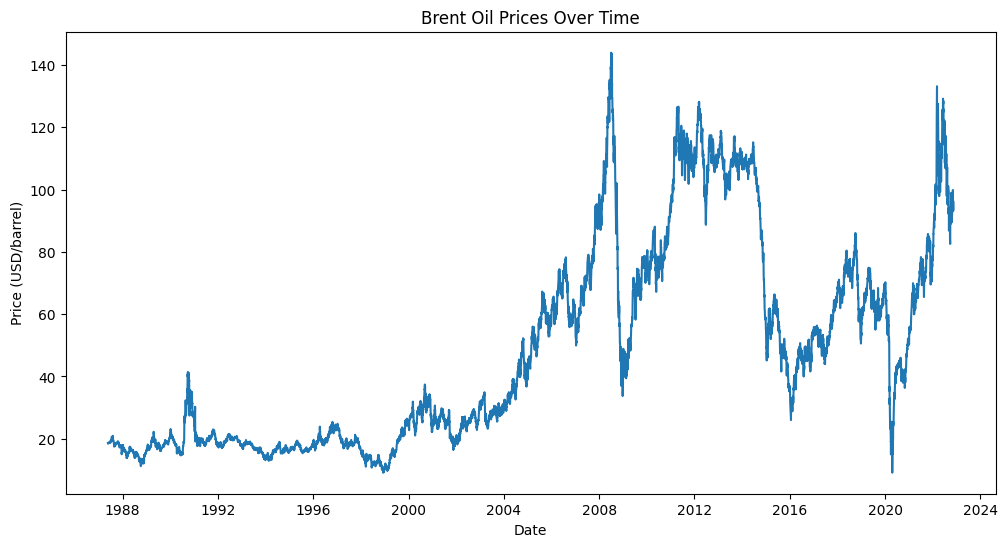

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(price_data['Price'])
plt.title("Brent Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD/barrel)")
plt.show()


### Decompose the time series

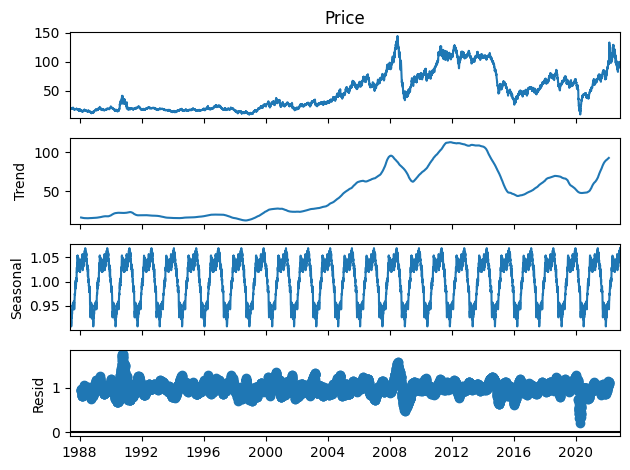

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose  # type: ignore
decomposition = seasonal_decompose(price_data['Price'], model='multiplicative', period=365)
decomposition.plot()
plt.show()


In [13]:
price_data.reset_index()


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


### Load Sample Oil Price Events

In [14]:
event_affect_oil= pd.read_csv('docs/oil_price_events_1987_2022.csv')


In [15]:
event_affect_oil.head()
event_affect_oil['Date'] = pd.to_datetime(event_affect_oil['Date'])


### Merge Event With Price

In [16]:
merged_price_event = price_data.merge(event_affect_oil, on='Date')


In [17]:
merged_price_event.head(11)


,Date,Price,Event,Impact_on_Oil_Prices
0,1987-10-19,19.10,Black Monday stock market crash,Decline due to economic concerns
1,1990-08-02,22.25,Iraq invades Kuwait (First Gulf War),Spike due to supply fears
2,2001-09-11,29.12,9/11 Terrorist Attacks,"Initial decline, then recovery"
3,2003-03-20,28.00,Iraq War begins,Increased due to instability
4,2008-07-11,143.68,Oil reaches all-time high of $147,Record high prices
5,2010-04-20,84.73,Deepwater Horizon Oil Spill,"Brief increase, then normalization"
6,2011-01-25,96.76,Arab Spring protests,Rise due to regional instability
7,2014-06-09,110.55,Oil price downturn begins,Downturn from oversupply
8,2016-01-20,26.01,Oil price drop below $30,Further decline due to low demand
9,2018-11-02,71.11,US sanctions on Iran,Rise due to geopolitical tension


In [18]:
merged_price_event = price_data.merge(event_affect_oil, on='Date', how='left').fillna(0)


In [19]:
merged_price_event.tail(10)


,Date,Price,Event,Impact_on_Oil_Prices
9001,2022-11-01,95.12,0,0
9002,2022-11-02,96.07,0,0
9003,2022-11-03,95.29,0,0
9004,2022-11-04,99.53,0,0
9005,2022-11-07,99.87,0,0
9006,2022-11-08,96.85,0,0
9007,2022-11-09,93.05,0,0
9008,2022-11-10,94.25,0,0
9009,2022-11-11,96.37,0,0
9010,2022-11-14,93.59,0,0


### Oil Price Over Time with Significant Events

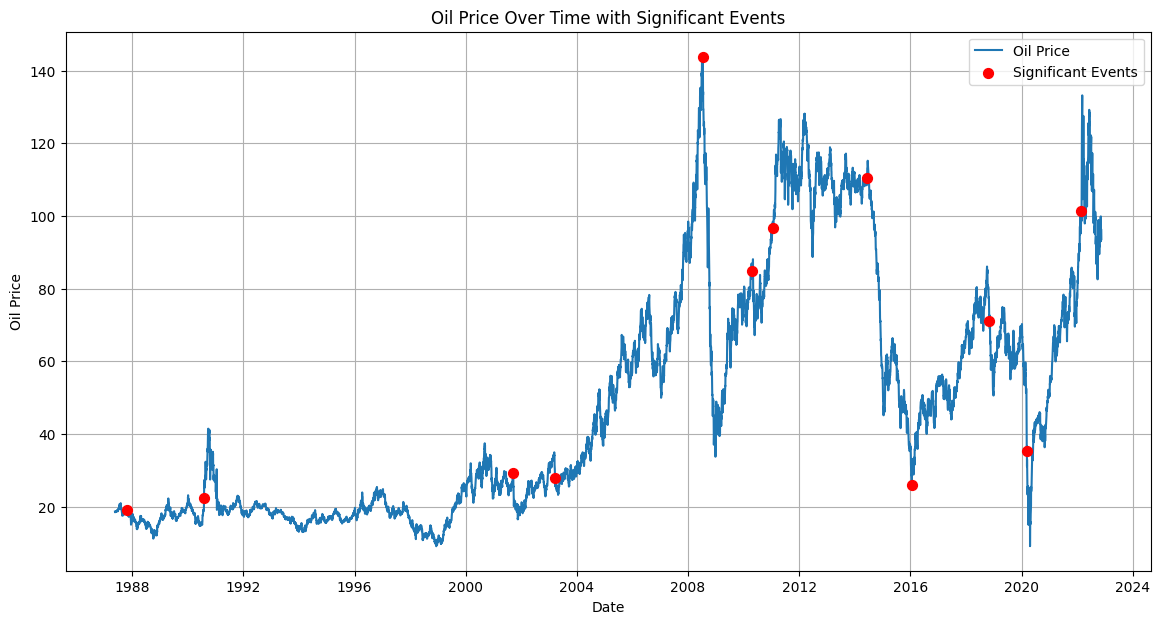

In [20]:
merged_price_event['Date'] = pd.to_datetime(merged_price_event['Date'])

merged_price_event.set_index('Date', inplace=True)

plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_price_event, x='Date', y='Price', label='Oil Price')

event_dates = merged_price_event[merged_price_event['Event'] != 0]
plt.scatter(event_dates.index, event_dates['Price'], color='red', label='Significant Events', s=50, zorder=5)

# Customize plot
plt.title("Oil Price Over Time with Significant Events")
plt.xlabel("Date")
plt.ylabel("Oil Price")
plt.legend()
plt.grid(True)
plt.show()


### Oil Price Over Time with Events Name

In [21]:
merged_price_event.reset_index(inplace=True)


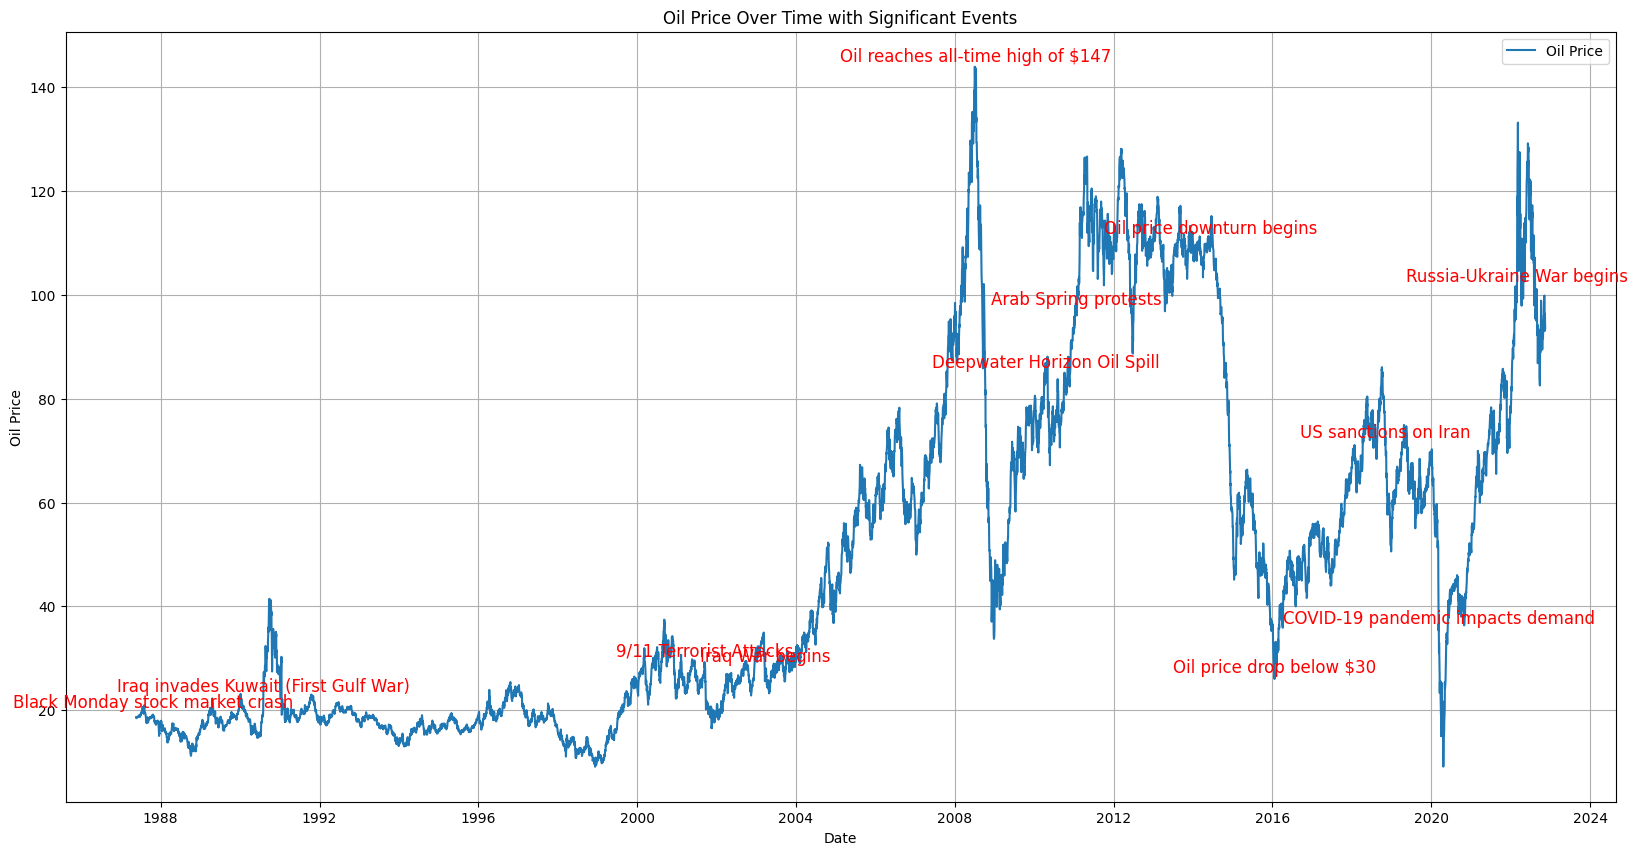

In [22]:
merged_price_event['Date'] = pd.to_datetime(merged_price_event['Date'])

merged_price_event.set_index('Date', inplace=True)

plt.figure(figsize=(20, 10))
sns.lineplot(data=merged_price_event, x=merged_price_event.index, y='Price', label='Oil Price')

event_dates = merged_price_event[merged_price_event['Event'] != 0]
for i in range(len(event_dates)):
    plt.annotate(event_dates['Event'].iloc[i], 
                 (event_dates.index[i], event_dates['Price'].iloc[i]), 
                 textcoords="offset points", 
                 xytext=(0, 5), 
                 ha='center', 
                 fontsize=12, 
                 color='red')

# Customize plot
plt.title("Oil Price Over Time with Significant Events")
plt.xlabel("Date")
plt.ylabel("Oil Price")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
import pymc as pm
import numpy as np

prices = price_data['Price'].values
n = len(prices)

with pm.Model() as model:

    change_point = pm.DiscreteUniform("change_point", lower=0, upper=n)

    mean1 = pm.Normal("mean1", mu=np.mean(prices[:n//2]), sigma=np.std(prices[:n//2]))
    mean2 = pm.Normal("mean2", mu=np.mean(prices[n//2:]), sigma=np.std(prices[n//2:]))
    sigma = pm.HalfNormal("sigma", sigma=10)

    idx = np.arange(n)
    mean = pm.math.switch(idx < change_point, mean1, mean2)
    obs = pm.Normal("obs", mu=mean, sigma=sigma, observed=prices)

    trace = pm.sample(1000, tune=1000, target_accept=0.9)


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [change_point]
>NUTS: [mean1, mean2, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


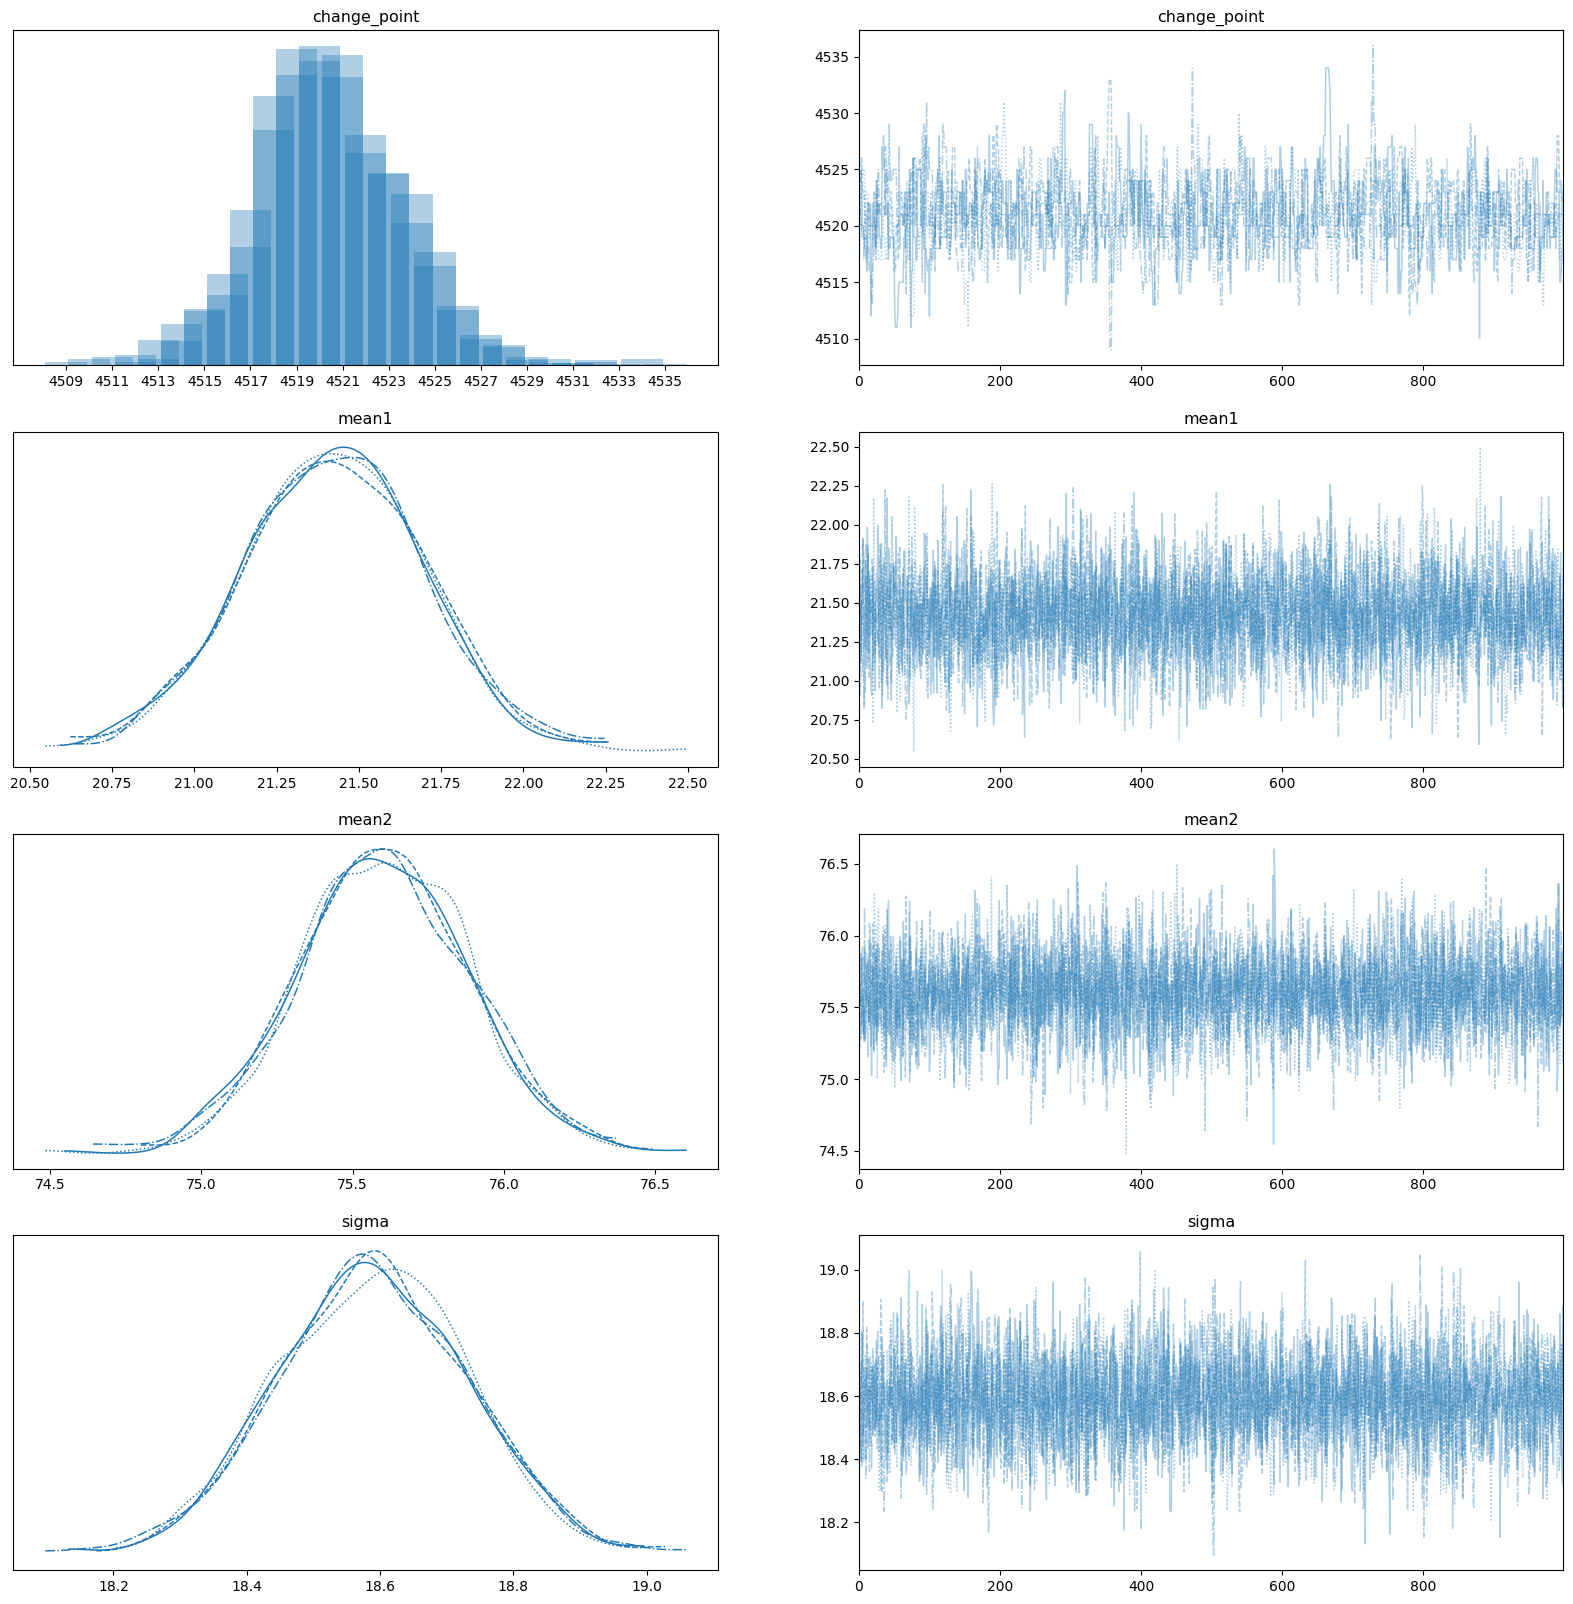

In [24]:
pm.plot_trace(trace,figsize=(20,20))
plt.show()
